In [2]:
import os
import glob
from datetime import datetime
from geogapfiller.gapfiller import gapfiller


## 1. Apply gap-filling methods to reconstruct geospatial data
This code implements four different gap-filling methods to reconstruct geospatial data, specifically using images derived from the Harmonized Landsat and Sentinel-2 [HLS](https://www.earthdata.nasa.gov/esds/harmonized-landsat-sentinel-2) dataset. The methods applied are Polynomial, Median, Harmonic, and LightGBM. Gap-filling is crucial for reconstructing data, as clouds, shadows, and other atmospheric conditions often affect the quality of the images. Description of the methods:

   - *Median approach*: The median is often favored over other statistical measures, such as the mean, because it is less affected by outliers that may result from atmospheric disturbances or sensor errors. This approach selects the median value from the cloud-free pixels in the time series, offering a straightforward solution. However, it does not account for the broader trends or seasonal variations in the data, which may limit its effectiveness in capturing long-term patterns.

   - *Polynomial approach*: The polynomial regression gap-filling approach models the relationship between a dependent variable and one or more independent variables. Higher-degree polynomials can represent more complex relationships, allowing for better data reconstruction. However, as the polynomial degree increases, the model becomes harder to interpret and requires more processing time.

    - *Harmonic approach*: The harmonic gap-filling approach leverages a Fourier-like series, using a combination of sine and cosine functions to estimate missing data. This method is widely applied in remote sensing because of its strength in capturing periodic and seasonal variations. Harmonic models tend to excel when data gaps are evenly distributed, as they can smoothly interpolate across time. However, when gaps are uneven or concentrated in specific periods, the model’s accuracy may decline, resulting in less reliable gap-filling.

    - *LightGBM approach*: The LightGBM gap-filling approach utilizes a tree-based learning algorithm to model relationships in the data. Unlike harmonic models, which assume periodicity, LightGBM does not rely on any inherent patterns and instead learns from the provided training data. It is known for its efficiency and produces results comparable to the Gradient Boosting Machine. LightGBM excels at capturing complex, nonlinear relationships, making it especially useful when EVI data deviates from a simple sinusoidal pattern.


This code can be used to fill gaps in any geospatial dataset, provided there is a stack of raster images available. The models are calibrated using data from a 15-day window—both before and after the target date for each pixel. For edge pixels, the first pixels are filled using the next available 15 days of data, while the last pixels are filled using the preceding 15 days.

To ensure accurate gap-filling, the user must extract the dates from the raster images correctly. In this code, dates are formatted as "YYYYMMDD" (e.g., "20230602"), and the following code snippet is used to extract these dates for filling gaps in the images.

In [3]:

# Function to extract the image dates and create a list of rasters
def img_pattern(img_path, pattern="NIR"):
    # Get a list of all raster files matching the pattern
    img_list = glob.glob(os.path.join(img_path, '**', f"*{pattern}.tif"), recursive=True)
    # Create an empty list to store the dates
    img_dates = []
    for img in img_list:
        img_date = os.path.basename(img).split("_")[0]  # Extract the date part from the filename
        convert_date = datetime.strptime(img_date, '%Y%m%d')
        img_dates.append(convert_date)  # Store both the file and the formatted date

    return img_list, img_dates


In [18]:
# Define the path to locate the images
img_path = r'C:\geogapfiller\data'
output_path = r'C:\geogapfiller'

# Extract the image dates and create a list of rasters
img_list, img_dates = img_pattern(img_path, pattern="NIR")
# Choose the method to fill the gaps (e.g., 'median', 'polynomial', 'harmonic', 'lightgbm')
filler = gapfiller.get_method("median")




## 1.1. Median gap-filling approach
The median is preferred over other statistical measures because it is less sensitive to outliers (e.g., mean), which can occur due to atmospheric disturbances or sensor errors. This is a simpler approach that considers the median value among other cloud-free pixels in the time series. However, the method does not take into account the overall trend and seasonality of the time series.

In [8]:
# Define the path to locate the images
inputdir = r'C:\hlsgapfiller\data'
# Define the path to save the filled images
outputdir = r'C:\crop_phenology\filled_images\goodwater\2023'


In [26]:
# List of filling gaps techniques
methods = ["Polynomial", "Median", "Harmonic", "LightGBM"]
# Base directory
base_dir = r'C:\crop_phenology'
# Tile id
#tile = f'T{tile_id}'
# Create a grid points to extract the predicted and observed values
# Define grid configuration
grid_distance = 200  # meters
# Distance from a border
offset = 100  # meters
year = '2023'

# List of dates
img_dates = ['2023-04-26']


# Create a list of functions
technique_funcs = [polynomial_filler._poly_filling, median_filler._median_filling,
                   knn_filler._knn_filling, harmonic_filler._harmonic_filling,
                   lightgbm_filler._lightgbm_filling]

# Fill the gaps using the techniques
techniques_filled_data = {}
for func, func_name in zip(technique_funcs, methods):
    evi_obs_values, evi_technique_values = techn_validator.valid_filling_techn(base_dir, img_dates, func, station_name, year, grid_distance, offset)
    techniques_filled_data[func_name] = evi_technique_values

# Plot the techniques metrics
techn_validator.plot_techniques_val(
    img_dates, evi_obs_values, techniques_filled_data['Polynomial'], techniques_filled_data['Median'],
    techniques_filled_data['Harmonic'], techniques_filled_data['LightGBM'], methods, base_dir, station_name
)

## 4. Predict EVI images
This code will predict the EVI images using the best filling gaps method. When changing the predicted interval, the images will be predicted according to this interval.

In [ ]:
# Base directory
# Define the base directory
base_dir = r'C:\crop_phenology'
#station_name = 'uiefmaize'
# Predicted interval change it according to the desired interval of image prediction
predicted_interval = 1
years = ['2023']
for year in years:
    # Call the function to predict the EVI images
    img_predictor.predicted_img(base_dir, station_name, predicted_interval, year)


## 5. Apply the Savitzky-Golay filter to the predicted EVI images
This code will apply the Savitzky-Golay filter to the predicted EVI images. Adjust the window length and polynomial order according to the desired filter.

In [8]:
base_dir = r'C:\crop_phenology'

# Define the window length and polynomial order
window_length = 70
poly_order = 2
station_name = 'goodwaterbau2'
# Call the functions to apply the Savitzky-Golay filter
savitzkygolay_filter.apply_sg_filter(base_dir, station_name, window_length, poly_order)


## 6. Plot the HLS Mean EVI in related to the Phenocam timeseries
This code will receive the field boundary where the phenocam is installed and plot the HLS Mean EVI in related to the Phenocam timeseries.


In [ ]:

# Define the path to the polygon shapefile representing the field boundary
polygon_path = r'C:\crop_phenology\phenocam_shapefile\field_of_view\field_phenocam_cone_final.shp'
base_dir = r'C:\crop_phenology'
#station_name = 'mandani2'
years = ['2021','2022']

for year in years:
    # Define the path to the Phenocam data for the current year
    phenocam_data = rf'C:\crop_phenology\phenocam_timeseries\{station_name}2_{year}.csv'

    # Process the Phenocam data for the current year
    filtered_phenocam = evi_mask_extractor.processing_phenocam_data(phenocam_data, interval=1)

    # Extract mean EVI values within the polygon shapefile for the current year
    mean_evi_values, dates_doy_mean = evi_mask_extractor.processing_hls_images(base_dir, station_name, polygon_path, year)

    # Extract mean EVI values from the original HLS images for the current year
    original_evi_values, date_doy = evi_mask_extractor.process_hls_original(base_dir, station_name, polygon_path, year)

    # Plot the GCC Phenocam Mean and EVI HLS Mean for the current year
    evi_mask_extractor.plot_phenocam_evi_comparison(filtered_phenocam, mean_evi_values, dates_doy_mean, original_evi_values, date_doy, station_name, base_dir, year)


## 7. Plot the phenological dates using the Zhong et al 2016

In [4]:
# Extract phenological dates from the HLS images predicted
polygon_path = r'C:\crop_phenology\phenocam_shapefile\field_of_view\field_phenocam_cone_final.shp'
base_dir = r'C:\crop_phenology'
#station_name = 'arkansascornsoy'
years = ['2021','2022']

for year in years:
    # Define the path to the Phenocam data for the current year
    phenocam_data = rf'C:\crop_phenology\phenocam_timeseries\{station_name}2_{year}.csv'
    export_excel = rf'C:\crop_phenology\dataframe\{station_name}_{year}_hls.xlsx'
    # Process the Phenocam data
      # Extract mean EVI values from the original HLS images for the current year
    mean_evi_values, dates_doy_mean = evi_mask_extractor.processing_hls_images(base_dir, station_name, polygon_path, year)
    # For simplicity, assuming all dates are from the same year. If multiple years are involved, this will need adjustment.

    # Convert DOY to datetime
    dates_mean = [pd.to_datetime(f'{year}{int(doy):03d}', format='%Y%j') for doy in dates_doy_mean]

    # Create a DataFrame with the extracted data
    data = {
        'date': dates_mean,
        'doy': dates_doy_mean,
        'EVI': mean_evi_values
    }
    df = pd.DataFrame(data)

    # Export combined DataFrame to Excel
    df.to_excel(export_excel, index=False)

In [ ]:
# Export original data to Excel

In [ ]:
# Define the path to the polygon shapefile representing the field boundary
polygon_path = r'C:\crop_phenology\phenocam_shapefile\field_of_view\field_phenocam_cone_final.shp'
base_dir = r'C:\crop_phenology'
#station_name = 'arsmorris1'
years = ['2021','2022', '2023']

for year in years:
    # Define the path to the Phenocam data for the current year

    export_excel = rf'C:\crop_phenology\original_dataframe\{station_name}_{year}_hls.xlsx'
    # Process the Phenocam data
    # Extract mean EVI values within a polygon shapefile representing the field boundary
    original_evi_values, date_doy = evi_mask_extractor.process_hls_original(base_dir, station_name, polygon_path, year)
    # For simplicity, assuming all dates are from the same year. If multiple years are involved, this will need adjustment.

    # Convert DOY to datetime
    dates_mean = [pd.to_datetime(f'{year}{int(doy):03d}', format='%Y%j') for doy in date_doy]

    # Create a DataFrame with the extracted data
    data = {
        'date': dates_mean,
        'doy': date_doy,
        'EVI': original_evi_values
    }
    df = pd.DataFrame(data)

    # Export combined DataFrame to Excel
    df.to_excel(export_excel, index=False)

In [ ]:
# Read the combined DataFrame
#data_frame = 'arsltarmdcr'
years = ['2021','2022', '2023']
database_name = 'predited_hls'
for year in years:
    df = rf'C:\crop_phenology\dataframe\{station_name}_{year}_hls.xlsx'

    base_dir = r'C:\crop_phenology'

    # Plot the phenological dates
    phenology_dates.extract_phenological_dates(df, base_dir, station_name, year, database_name)

In [ ]:
# Extract phenological dates from the original HLS images
#station_name = 'arsope3ltar'
years = ['2021','2022', '2023']
database_name = 'original_hls'
base_dir = r'C:\crop_phenology'

for year in years:
    df = rf'C:\crop_phenology\original_dataframe\{station_name}_{year}_hls.xlsx'
    # Plot the phenological dates
    phenology_dates.extract_phenological_dates(df, base_dir, station_name, year, database_name)

In [ ]:
# Normalize the GCC values from phenocam
#station_name = 'uiefmaize2'
base_dir = r'C:\crop_phenology'
years = ['2021','2022','2023']

for year in years:
    # Define the path to the Phenocam data for the current year
    gcc_data = rf'C:\crop_phenology\phenocam_timeseries\{station_name}2_{year}.csv'

    window_length = 70
    poly_order = 3

    normalize_gcc.normalize_gcc(base_dir, station_name, year, gcc_data, window_length, poly_order)


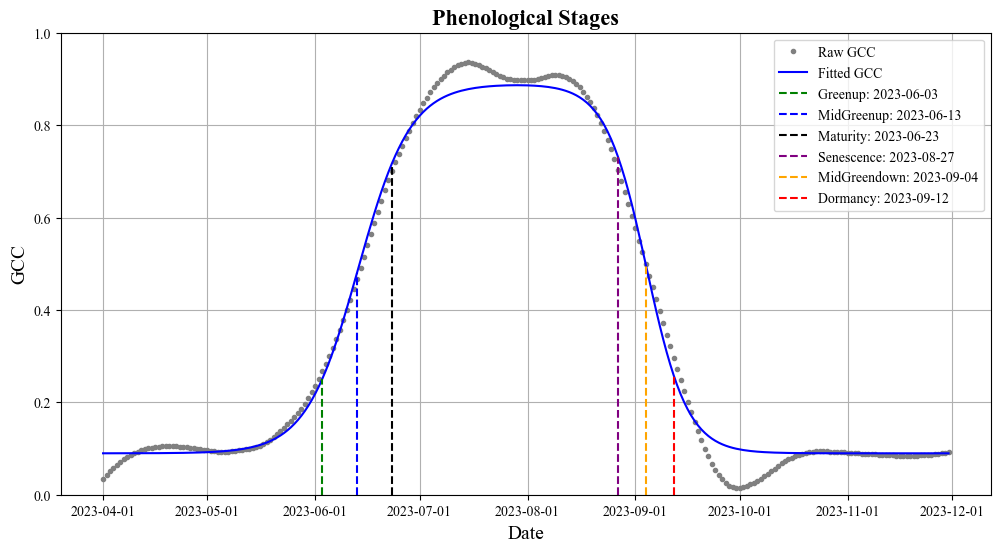

In [2]:
# Extract phenological dates from the normalized GCC values
station_name = 'arsmorris3'
years = ['2023']
base_dir = r'C:\crop_phenology'
database_name = 'phenocam_dates'

for year in years:
    data_frame = f'phenocam_{station_name}'
    df_phenocam = rf'C:\crop_phenology\phenocam_normalized\{station_name}\{station_name}_{year}_normalized_smoothed.xlsx'

    # Plot the phenological dates
    phenology_dates.extract_phenological_dates(df_phenocam, base_dir, data_frame, year, database_name)

## 9. Calibrate the HLS data using the phenocam data


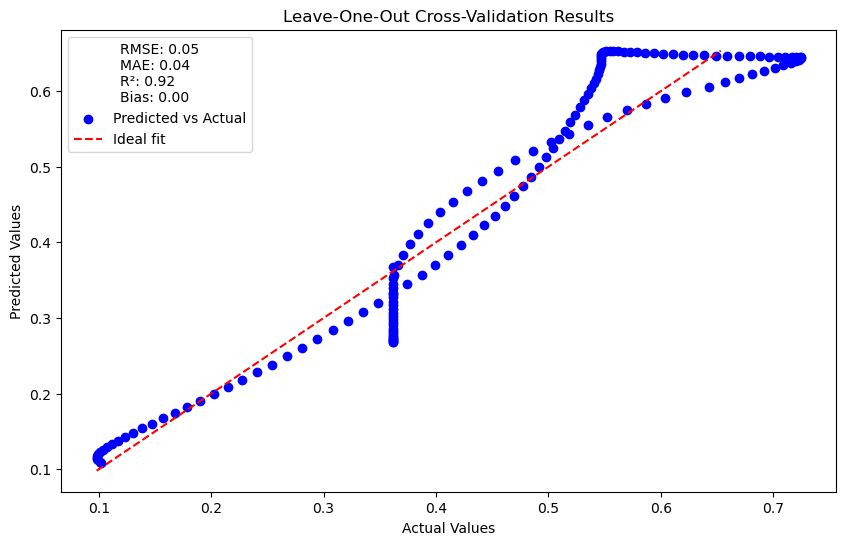

In [57]:
# station_name = 'goodwater'
# years = ['2022']
# base_dir = r'C:\crop_phenology'
#
# for year in years:
#     dataframe_path = rf'C:\crop_phenology\calibration_dataset\{station_name}_{year}.xlsx'
#     calibrate_timeseries.calibrate_hls_timeseries(dataframe_path, station_name, year, base_dir)

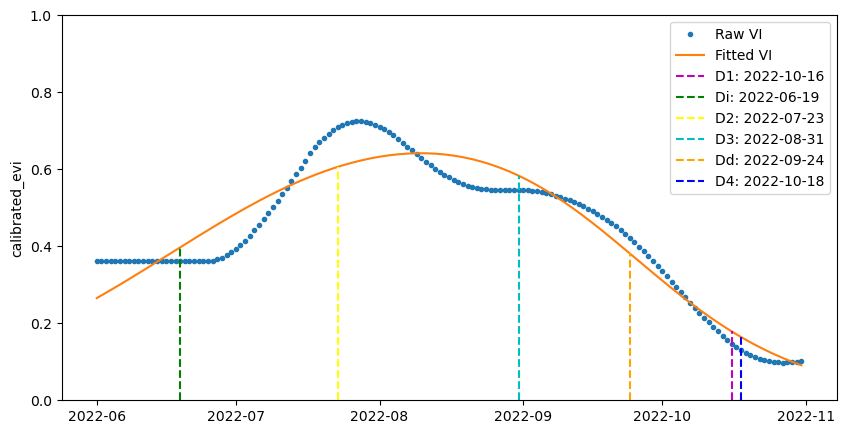

In [58]:
# # Apply the function to extract phenological dates
# station_name = 'goodwater'
# data_frame = f'calibrated_{station_name}'
# years = ['2022']
# base_dir = r'C:\crop_phenology'
#
# for year in years:
#     df_hls = rf'C:\crop_phenology\calibrated_hls\calibrated_values\{station_name}_{year}_hls_calibrated.xlsx'
#
#     calibrate_timeseries.extract_phenological_dates(df_hls, base_dir, data_frame, year)
#



## 9. Create an animation of the Phenocam images and time series of GCC and EVI

C:\anaconda\envs\hls\lib\site-packages\shapely\geometry\polygon.py:260: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  self.geometry = None
C:\anaconda\envs\hls\lib\site-packages\shapely\geometry\polygon.py:260: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  self.geometry = None
C:\anaconda\envs\hls\lib\site-packages\shapely\geometry\polygon.py:260: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  self.geometry = None
C:\crop_phenology\src\cropphenology\extract_phenology\timeplot.py:130: RuntimeWarning: Mean of empty slice
  mean_value = np.nanmean(masked_image)


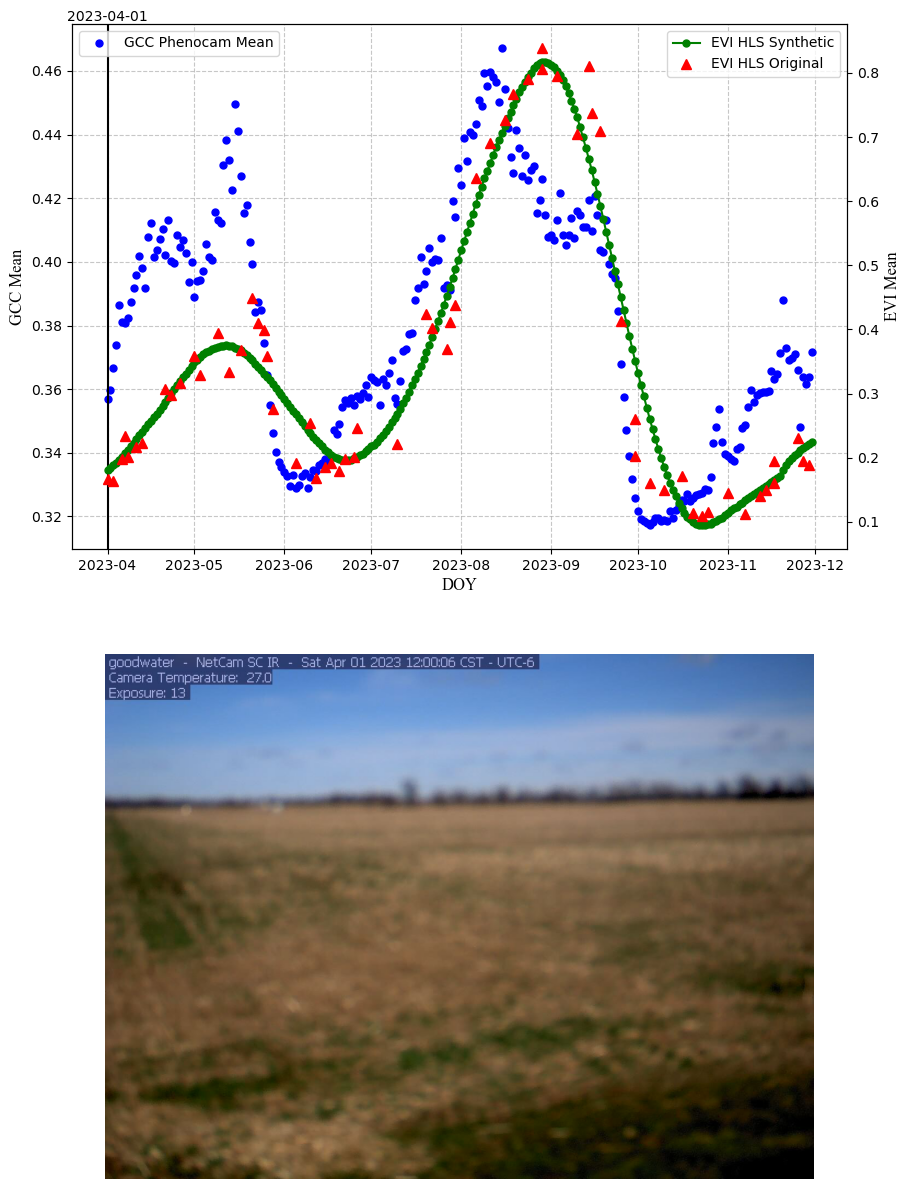

In [86]:

# base dir
base_dir = r'C:\crop_phenology'
station_name = 'goodwater'
# Define the path to the polygon shapefile representing the field boundary
polygon_path = r'C:\crop_phenology\phenocam_shapefile\field_of_view\field_phenocam_cone_final.shp'
phenocam_data = r'C:\crop_phenology\database\goodwater\goodwater_2023.csv'
export_excel = rf'C:\crop_phenology\dataframe\{station_name}_phenocam.xlsx'
# Process the Phenocam data
filtered_phenocam = timeplot.processing_phenocam_data(phenocam_data, interval=1)
# Extract mean EVI values within a polygon shapefile representing the field boundary
mean_evi_values, dates_doy_mean = timeplot.processing_hls_images(base_dir, station_name, polygon_path)
# Extract mean EVI values from the original HLS images
original_evi_values, date_doy = timeplot.process_hls_original(base_dir, station_name, polygon_path)

# Convert the dates from filtered_phenocam['date'] to Day of Year (DOY)
dates_img_phenocam = pd.to_datetime(filtered_phenocam['date'])

# Create a list of image paths
_, image_paths = timeplot.exctrat_phenocam_dates(base_dir, station_name)

# Call the function to create the animation with the timelapse
timeplot.plot_phenocam_evi_comparison_with_animation(filtered_phenocam, mean_evi_values, dates_doy_mean, original_evi_values, date_doy,
                                            station_name, base_dir, dates_img_phenocam, image_paths)
